# ANÁLISIS DE DATOS DE COMPRA EN CADENA DE SUPERMERCADO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option('display.float_format','{:.2f}'.format)

In [3]:
# Carga de datos
data = pd.read_csv('Superstore.csv', parse_dates=['Order Date', 'Ship Date'])

In [4]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [5]:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.25,3,0.20,4.10
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2,0.00,15.63
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.58,2,0.20,19.39
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4,0.00,13.32
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.16,2,0.00,72.95


In [6]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [7]:
data['Discount'] = data.Sales * data.Discount

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [9]:
# Elimino la variable Row ID
data.drop('Row ID', axis=1, inplace=True)

In [10]:
minf = data['Order Date'].min()
maxf = data['Order Date'].max()
print('='*64)
print('DATOS COMPRENDEN DESDE '+str(minf)+' HASTA '+str(maxf))
print('='*64)

DATOS COMPRENDEN DESDE 2014-01-03 00:00:00 HASTA 2017-12-30 00:00:00


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.00,55190.38,32063.69,1040.00,23223.00,56430.50,90008.00,99301.00
Sales,9994.00,229.86,623.25,0.44,17.28,54.49,209.94,22638.48
Quantity,9994.00,3.79,2.23,1.00,2.00,3.00,5.00,14.00
Discount,9994.00,32.28,164.03,0.00,0.00,1.04,14.87,11319.24
Profit,9994.00,28.66,234.26,-6599.98,1.73,8.67,29.36,8399.98


In [12]:
print('CANTIDAD DE VALORES ÚNICOS POR VARIABLE CATEGÓRICA:')
print('='*64)
for cat in data.select_dtypes('object'):
        print(cat+' : '+ str(data[cat].nunique()))

CANTIDAD DE VALORES ÚNICOS POR VARIABLE CATEGÓRICA:
Order ID : 5009
Ship Mode : 4
Customer ID : 793
Customer Name : 793
Segment : 3
Country : 1
City : 531
State : 49
Region : 4
Product ID : 1862
Category : 3
Sub-Category : 17
Product Name : 1850


In [13]:
print('VALORES ÚNICOS POR VARIABLE CATEGÓRICA:')
print('='*64)
print('='*64)
for vcat in data.select_dtypes('object'):
    if data[vcat].nunique() <= 17:
        print(vcat+' :')
        print(data[vcat].unique())
        print('='*64)

VALORES ÚNICOS POR VARIABLE CATEGÓRICA:
Ship Mode :
['Second Class' 'Standard Class' 'First Class' 'Same Day']
Segment :
['Consumer' 'Corporate' 'Home Office']
Country :
['United States']
Region :
['South' 'West' 'Central' 'East']
Category :
['Furniture' 'Office Supplies' 'Technology']
Sub-Category :
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


## ANÁLISIS POR REGIONES

In [14]:
grouped_by_region = data.groupby(['Region']).sum().drop('Postal Code', axis=1)
grouped_by_region['percent_sales'] = round(grouped_by_region.Sales / sum(grouped_by_region.Sales) * 100, 2)
grouped_by_region['percent_quantity'] = round(grouped_by_region.Quantity / sum(grouped_by_region.Quantity) * 100, 2)
grouped_by_region['percent_discount'] = round(grouped_by_region.Discount / sum(grouped_by_region.Discount) * 100, 2)
grouped_by_region['percent_profit'] = round(grouped_by_region.Profit / sum(grouped_by_region.Profit) * 100, 2)
grouped_by_region

,Sales,Quantity,Discount,Profit,percent_sales,percent_quantity,percent_discount,percent_profit
Region,,,,,,,,
Central,501239.89,8780,77787.66,39706.36,21.82,23.18,24.11,13.86
East,678781.24,10618,94608.63,91522.78,29.55,28.04,29.33,31.96
South,391721.91,6209,56779.16,46749.43,17.05,16.39,17.60,16.32
West,725457.82,12266,93406.68,108418.45,31.58,32.39,28.96,37.86


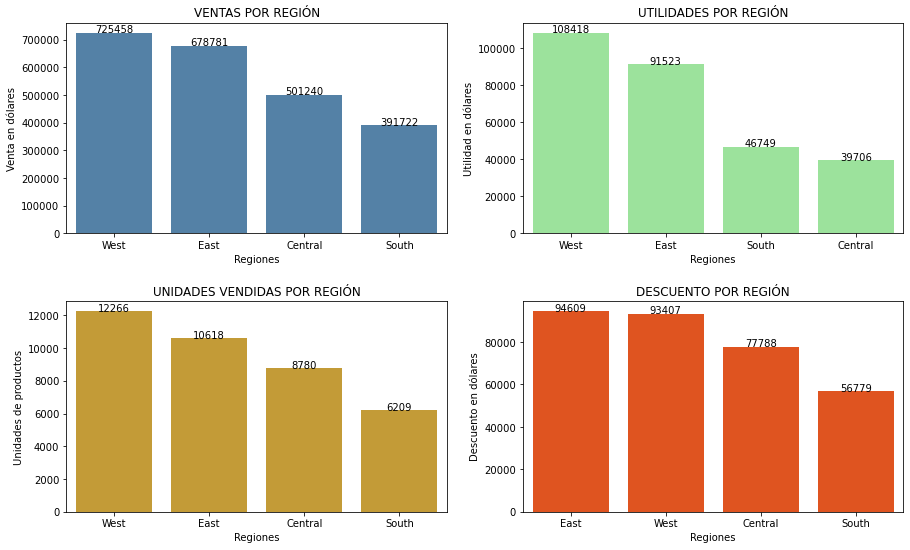

In [15]:
# Visualización de datos por región
# ===================================================================================================

fig, ax = plt.subplots(2,2, figsize=(15,9))

# Ventas por región
region_sales = grouped_by_region['Sales'].sort_values(ascending=False)
sns.barplot(x=region_sales.index, y=region_sales.values, color='steelblue', ax=ax[0,0])
for idx, value in enumerate(region_sales.values):
    ax[0,0].text(x=idx, y=value, color='black', s=round(value), ha='center')
ax[0,0].set_title('VENTAS POR REGIÓN')
ax[0,0].set_xlabel('Regiones')
ax[0,0].set_ylabel('Venta en dólares')

# Cantidad de producto vendido por región
region_quantity = grouped_by_region['Quantity'].sort_values(ascending=False)
sns.barplot(x=region_quantity.index, y=region_quantity.values, color='goldenrod', ax=ax[1,0])
for idx, value in enumerate(region_quantity.values):
    ax[1,0].text(x=idx, y=value, color='black', s=round(value), ha='center')
ax[1,0].set_title('UNIDADES VENDIDAS POR REGIÓN')
ax[1,0].set_xlabel('Regiones')
ax[1,0].set_ylabel('Unidades de productos')

# Utilidad por región
region_profit = grouped_by_region['Profit'].sort_values(ascending=False)
sns.barplot(x=region_profit.index, y=region_profit.values, color='lightgreen', ax=ax[0,1])
for idx, value in enumerate(region_profit.values):
    ax[0,1].text(x=idx, y=value, color='black', s=round(value), ha='center')
ax[0,1].set_title('UTILIDADES POR REGIÓN')
ax[0,1].set_xlabel('Regiones')
ax[0,1].set_ylabel('Utilidad en dólares')

# Descuento por región
region_discount = grouped_by_region['Discount'].sort_values(ascending=False)
sns.barplot(x=region_discount.index, y=region_discount.values, color='orangered', ax=ax[1,1])
for idx, value in enumerate(region_discount.values):
    ax[1,1].text(x=idx, y=value, color='black', s=round(value), ha='center')
ax[1,1].set_title('DESCUENTO POR REGIÓN')
ax[1,1].set_xlabel('Regiones')
ax[1,1].set_ylabel('Descuento en dólares')

plt.subplots_adjust(hspace=.32)
plt.show()

## ANÁLISIS POR SEGMENTO DE CLIENTES

In [16]:
# Datos agrupados por segmento de clientes
grouped_by_segment = data.groupby(['Segment']).sum().drop('Postal Code', axis=1)
grouped_by_segment['percent_sales'] = round(grouped_by_segment['Sales'] / sum(grouped_by_segment['Sales']) * 100, 2)
grouped_by_segment['percent_quantity'] = round(grouped_by_segment['Quantity'] / sum(grouped_by_segment['Quantity']) * 100, 2)
grouped_by_segment['percent_discount'] = round(grouped_by_segment['Discount'] / sum(grouped_by_segment['Discount']) * 100, 2)
grouped_by_segment['percent_profit'] = round(grouped_by_segment['Profit'] / sum(grouped_by_segment['Profit']) * 100, 2)
grouped_by_segment

,Sales,Quantity,Discount,Profit,percent_sales,percent_quantity,percent_discount,percent_profit
Segment,,,,,,,,
Consumer,1161401.34,19521,166267.36,134119.21,50.56,51.54,51.54,46.83
Corporate,706146.37,11608,91389.40,91979.13,30.74,30.65,28.33,32.12
Home Office,429653.15,6744,64925.37,60298.68,18.70,17.81,20.13,21.05


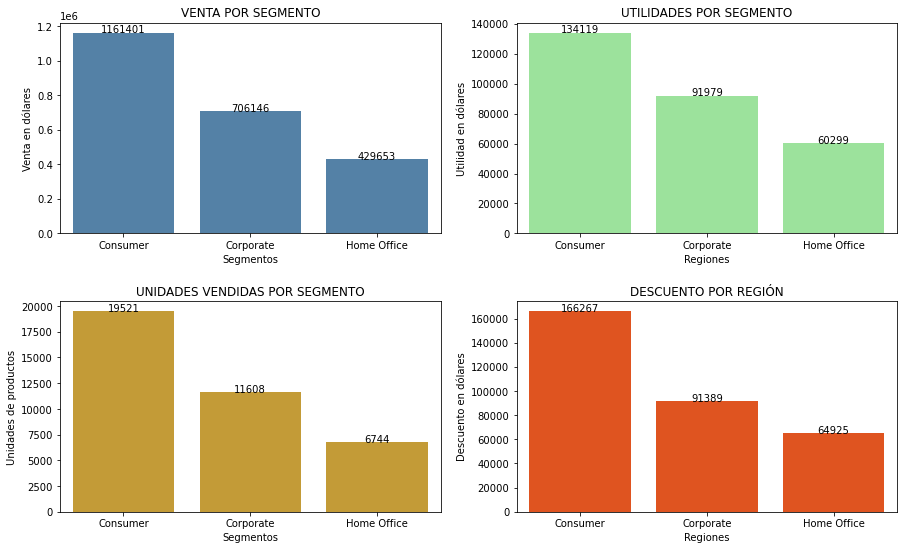

In [17]:
# Visualización de datos por segmentos
# ===================================================================================================

fig, ax = plt.subplots(2,2, figsize=(15,9))

# Ventas por segmento
segment_sales = grouped_by_segment['Sales'].sort_values(ascending=False)
sns.barplot(x=segment_sales.index, y=segment_sales.values, color='steelblue', ax=ax[0,0])
for idx, value in enumerate(segment_sales.values):
    ax[0,0].text(x=idx, y=value, color='black', s=round(value), ha='center')
ax[0,0].set_title('VENTA POR SEGMENTO')
ax[0,0].set_xlabel('Segmentos')
ax[0,0].set_ylabel('Venta en dólares')

#Cantidad de unidades vendidas por segmento
segment_quantity = grouped_by_segment['Quantity'].sort_values(ascending=False)
sns.barplot(x=segment_quantity.index, y=segment_quantity.values, color='goldenrod', ax=ax[1,0])
for idx, value in enumerate(segment_quantity.values):
    ax[1,0].text(x=idx, y=value, color='black', s=round(value), ha='center')
ax[1,0].set_title('UNIDADES VENDIDAS POR SEGMENTO')
ax[1,0].set_xlabel('Segmentos')
ax[1,0].set_ylabel('Unidades de productos')

# Utilidad por segmento
segment_profit = grouped_by_segment['Profit'].sort_values(ascending=False)
sns.barplot(x=segment_profit.index, y=segment_profit.values, color='lightgreen', ax=ax[0,1])
for idx, value in enumerate(segment_profit.values):
    ax[0,1].text(x=idx, y=value, color='black', s=round(value), ha='center')
ax[0,1].set_title('UTILIDADES POR SEGMENTO')
ax[0,1].set_xlabel('Regiones')
ax[0,1].set_ylabel('Utilidad en dólares')

#Descuento por segmentos
segment_discount = grouped_by_segment['Discount'].sort_values(ascending=False)
sns.barplot(x=segment_discount.index, y=segment_discount.values, color='orangered', ax=ax[1,1])
for idx, value in enumerate(segment_discount.values):
    ax[1,1].text(x=idx, y=value, color='black', s=round(value), ha='center')
ax[1,1].set_title('DESCUENTO POR REGIÓN')
ax[1,1].set_xlabel('Regiones')
ax[1,1].set_ylabel('Descuento en dólares')

plt.subplots_adjust(hspace=.32)
plt.show()

## ANÁLISIS POR CATEGORÍA DE PRODUCTOS

In [18]:
grouped_by_category = data.groupby(['Category']).sum().drop('Postal Code', axis=1)
grouped_by_category['percent_sales'] = round(grouped_by_category.Sales / sum(grouped_by_category.Sales) * 100, 2)
grouped_by_category['percent_quantity'] = round(grouped_by_category.Quantity / sum(grouped_by_category.Quantity) * 100, 2)
grouped_by_category['percent_discount'] = round(grouped_by_category.Discount / sum(grouped_by_category.Discount) * 100, 2)
grouped_by_category['percent_profit'] = round(grouped_by_category.Profit / sum(grouped_by_category.Profit) * 100, 2)
grouped_by_category

,Sales,Quantity,Discount,Profit,percent_sales,percent_quantity,percent_discount,percent_profit
Category,,,,,,,,
Furniture,741999.80,8028,123516.54,18451.27,32.30,21.20,38.29,6.44
Office Supplies,719047.03,22906,76404.94,122490.80,31.30,60.48,23.69,42.77
Technology,836154.03,6939,122660.65,145454.95,36.40,18.32,38.02,50.79


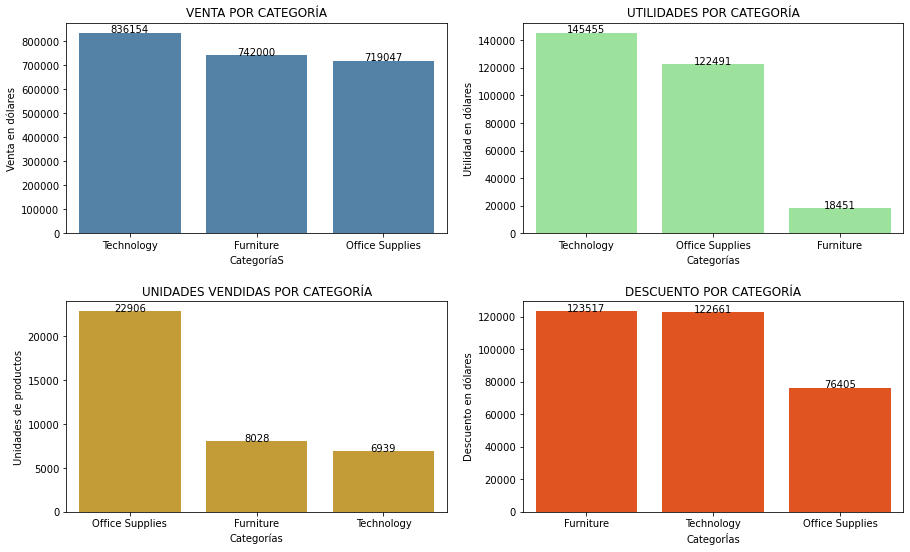

In [19]:
# Visualización de datos por categoría de producto
# ===================================================================================================

fig, ax = plt.subplots(2,2, figsize=(15,9))

category_sales = grouped_by_category['Sales'].sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values, color='steelblue', ax=ax[0,0])
for idx, value in enumerate(category_sales.values):
    ax[0,0].text(x=idx, y=value, color='black', s=round(value), ha='center')
ax[0,0].set_title('VENTA POR CATEGORÍA')
ax[0,0].set_xlabel('CategoríaS')
ax[0,0].set_ylabel('Venta en dólares')

# Cantidad de productos vendidos por categoría
category_quantity = grouped_by_category['Quantity'].sort_values(ascending=False)
sns.barplot(x=category_quantity.index, y=category_quantity.values, color='goldenrod', ax=ax[1,0])
for idx, value in enumerate(category_quantity.values):
    ax[1,0].text(x=idx, y=value, color='black', s=round(value), ha='center')
ax[1,0].set_title('UNIDADES VENDIDAS POR CATEGORÍA')
ax[1,0].set_xlabel('Categorías')
ax[1,0].set_ylabel('Unidades de productos')

# Utilidades por categoría
category_profit = grouped_by_category['Profit'].sort_values(ascending=False)
sns.barplot(x=category_profit.index, y=category_profit.values, color='lightgreen', ax=ax[0,1])
for idx, value in enumerate(category_profit.values):
    ax[0,1].text(x=idx, y=value, color='black', s=round(value), ha='center')
ax[0,1].set_title('UTILIDADES POR CATEGORÍA')
ax[0,1].set_xlabel('Categorías')
ax[0,1].set_ylabel('Utilidad en dólares')

# Descuento por categoría
category_discount = grouped_by_category['Discount'].sort_values(ascending=False)
sns.barplot(x=category_discount.index, y=category_discount.values, color='orangered', ax=ax[1,1])
for idx, value in enumerate(category_discount.values):
    ax[1,1].text(x=idx, y=value, color='black', s=round(value), ha='center')
ax[1,1].set_title('DESCUENTO POR CATEGORÍA')
ax[1,1].set_xlabel('CategorÍas')
ax[1,1].set_ylabel('Descuento en dólares')

plt.subplots_adjust(hspace=.32)
plt.show()

## ANÁLISIS POR SUBCATEGORÍA DE PRODUCTO

In [20]:
grouped_by_subcategory = data.groupby(['Sub-Category']).sum().drop('Postal Code', axis=1)
grouped_by_subcategory['percent_sales'] = round(grouped_by_subcategory['Sales'] / sum(grouped_by_subcategory['Sales'])*100, 2)
grouped_by_subcategory['percent_quantity'] = round(grouped_by_subcategory['Quantity'] / sum(grouped_by_subcategory['Quantity'])*100, 2)
grouped_by_subcategory['percent_discount'] = round(grouped_by_subcategory['Discount'] / sum(grouped_by_subcategory['Discount'])*100, 2)
grouped_by_subcategory['percent_profit'] = round(grouped_by_subcategory['Profit'] / sum(grouped_by_subcategory['Profit'])*100, 2)
grouped_by_subcategory

,Sales,Quantity,Discount,Profit,percent_sales,percent_quantity,percent_discount,percent_profit
Sub-Category,,,,,,,,
Accessories,167380.32,2976,9802.00,41936.64,7.29,7.86,3.04,14.64
Appliances,107532.16,1729,7490.30,18138.01,4.68,4.57,2.32,6.33
Art,27118.79,3000,1820.83,6527.79,1.18,7.92,0.56,2.28
Binders,203412.73,5974,43745.08,30221.76,8.85,15.77,13.56,10.55
Bookcases,114880.00,868,20800.59,-3472.56,5.00,2.29,6.45,-1.21
Chairs,328449.10,2356,49814.80,26590.17,14.30,6.22,15.44,9.28
Copiers,149528.03,234,17999.73,55617.82,6.51,0.62,5.58,19.42
Envelopes,16476.40,906,1173.99,6964.18,0.72,2.39,0.36,2.43
Fasteners,3024.28,914,240.29,949.52,0.13,2.41,0.07,0.33


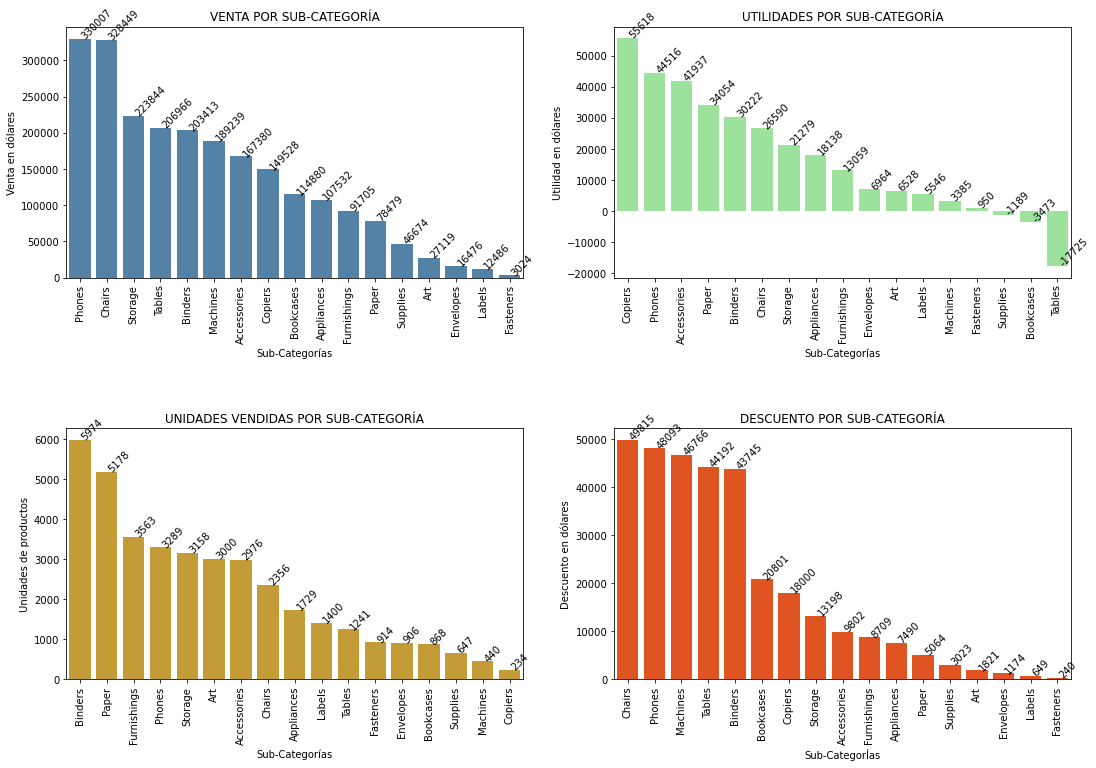

In [21]:
# Visualización de datos por sub-categoría de producto
# ===================================================================================================

fig, ax = plt.subplots(2,2, figsize=(18,12))

# Ventas por subcategoría 
subcategory_sales = grouped_by_subcategory['Sales'].sort_values(ascending=False) # Data agrupada por subcategoría
sns.barplot(x=subcategory_sales.index, y=subcategory_sales.values, color='steelblue', ax=ax[0,0])
for idx, value in enumerate(subcategory_sales.values):
    ax[0,0].text(x=idx, y=value, color='black', s=round(value), rotation=45)
ax[0,0].set_title('VENTA POR SUB-CATEGORÍA')
ax[0,0].set_xlabel('Sub-Categorías')
ax[0,0].set_ylabel('Venta en dólares')
plt.setp(ax[0,0].xaxis.get_majorticklabels(), rotation=90)

# Cantidad de producto vendido por subcategoría
subcategory_quantity = grouped_by_subcategory['Quantity'].sort_values(ascending=False)
sns.barplot(x=subcategory_quantity.index, y=subcategory_quantity.values, color='goldenrod', ax=ax[1,0])
for idx, value in enumerate(subcategory_quantity.values):
    ax[1,0].text(x=idx, y=value, color='black', s=round(value), rotation=45)
ax[1,0].set_title('UNIDADES VENDIDAS POR SUB-CATEGORÍA')
ax[1,0].set_xlabel('Sub-Categorías')
ax[1,0].set_ylabel('Unidades de productos')
plt.setp(ax[1,0].xaxis.get_majorticklabels(), rotation=90)

# Utilidades por subcategoría
subcategory_profit = grouped_by_subcategory['Profit'].sort_values(ascending=False)
sns.barplot(x=subcategory_profit.index, y=subcategory_profit.values,
            color='lightgreen', ax=ax[0,1])
for idx, value in enumerate(subcategory_profit.values):
    ax[0,1].text(x=idx, y=value, color='black', s=round(value), rotation=45)
ax[0,1].set_title('UTILIDADES POR SUB-CATEGORÍA')
ax[0,1].set_xlabel('Sub-Categorías')
ax[0,1].set_ylabel('Utilidad en dólares')
plt.setp(ax[0,1].xaxis.get_majorticklabels(), rotation=90)

# Descuento por subcategoría
subcategory_discount = grouped_by_subcategory['Discount'].sort_values(ascending=False)
sns.barplot(x=subcategory_discount.index, y=subcategory_discount.values, color='orangered', ax=ax[1,1])
for idx, value in enumerate(subcategory_discount.values):
    ax[1,1].text(x=idx, y=value, color='black', s=round(value), rotation=45)
ax[1,1].set_title('DESCUENTO POR SUB-CATEGORÍA')
ax[1,1].set_xlabel('Sub-CategorÍas')
ax[1,1].set_ylabel('Descuento en dólares')
plt.setp(ax[1,1].xaxis.get_majorticklabels(), rotation=90)

plt.subplots_adjust(hspace=.6)
plt.show()

### SUB-CATEGORÍAS QUE REPORTAN PÉRDIDAS

In [22]:
losses = data[data['Sub-Category'].isin(['Supplies','Bookcases','Tables'])]

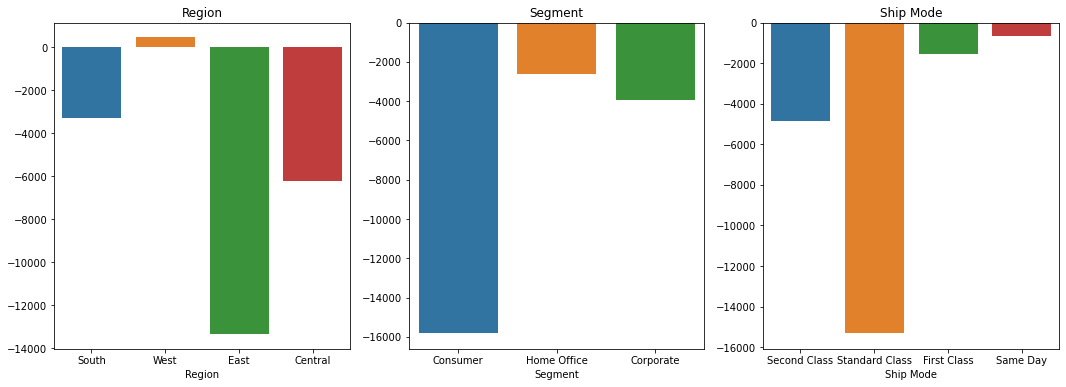

In [23]:
fig, ax = plt.subplots(1,3, figsize=(18,6))

for i, var in enumerate(['Region','Segment','Ship Mode']):
    sns.barplot(x=losses[var], y=losses.Profit, estimator=sum, ci=None, ax=ax[i])
    ax[i].set_title(var)
    ax[i].set_ylabel(None)

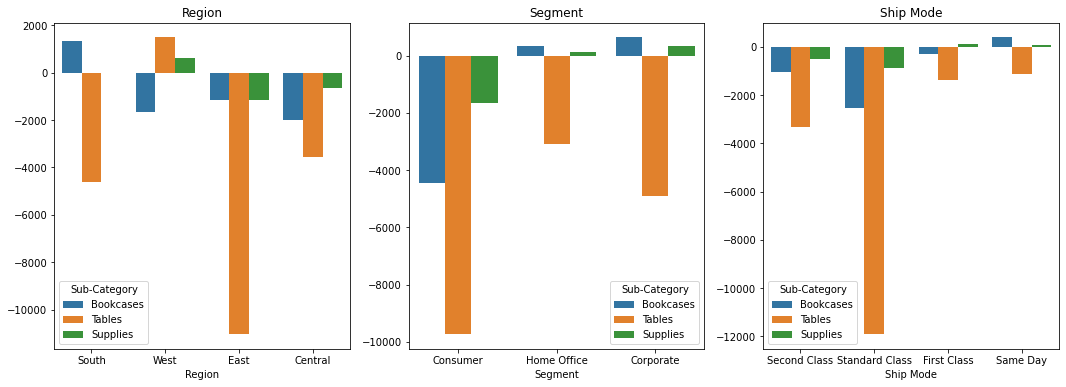

In [24]:
# Gráficas de pérdidas por Región, Segmento de cliente, Modo de envío
# ===========================================================================

fig, ax = plt.subplots(1,3, figsize=(18,6))

for i, var in enumerate(['Region','Segment','Ship Mode']):
    sns.barplot(x=losses[var], y=losses.Profit, hue=losses['Sub-Category'], estimator=sum, ci=None, ax=ax[i])
    ax[i].set_title(var)
    ax[i].set_ylabel(None)
    

### Pérdidas en Mesas (Tables)

In [25]:
# Productos que generan pérdidas
tables = losses[losses['Sub-Category']=='Tables']
tables_product_id = tables.groupby('Product ID').sum()
tables_product_id['lost_percent'] = tables_product_id.Profit / sum(tables_product_id.Profit) * 100
tables_product_id = tables_product_id.sort_values('lost_percent', ascending=False)


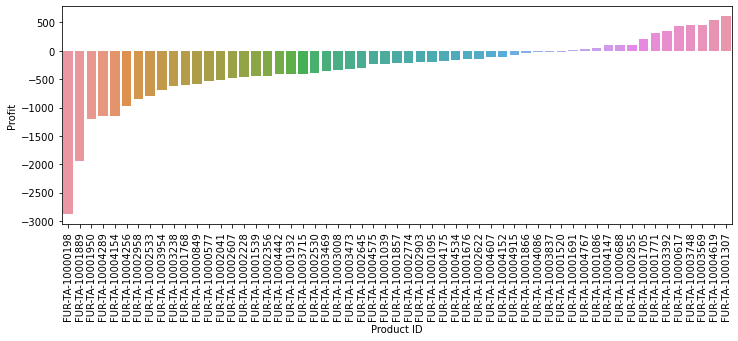

In [26]:
plt.figure(figsize=(12, 4))
sns.barplot(x=tables_product_id.index, y=tables_product_id.Profit)
plt.xticks(rotation=90)
plt.show()

### Pérdidas en Estanterías (Bookcases)

In [27]:
# Productos que generan pérdidas
bookcases = losses[losses['Sub-Category']=='Bookcases']
bookcases_product_id = bookcases.groupby('Product ID').sum()
bookcases_product_id['lost_percent'] = bookcases_product_id.Profit / sum(bookcases_product_id.Profit) * 100
bookcases_product_id = bookcases_product_id.sort_values('lost_percent', ascending=False)

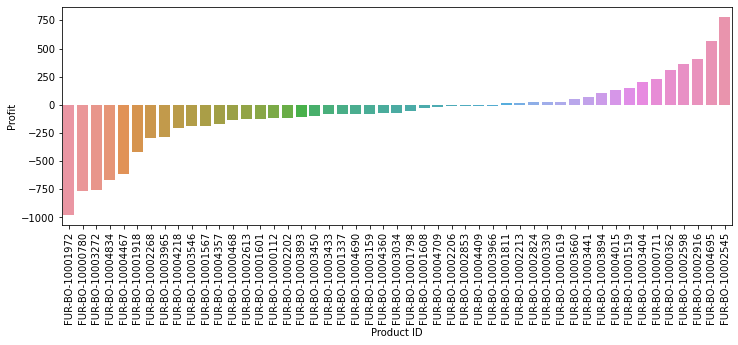

In [28]:
plt.figure(figsize=(12, 4))
sns.barplot(x=bookcases_product_id.index, y=bookcases_product_id.Profit)
plt.xticks(rotation=90)
plt.show()

In [29]:
#bookcases_lost_product_id = 
bookcases_loss_percent = bookcases_product_id['lost_percent'].where(bookcases_product_id.Profit <= 0)
bookcases_loss_percent = bookcases_loss_percent.dropna()
bookcases_loss_percent

Product ID
FUR-BO-10001972   28.08
FUR-BO-10000780   22.11
FUR-BO-10003272   21.76
FUR-BO-10004834   19.28
FUR-BO-10004467   17.65
FUR-BO-10001918   12.05
FUR-BO-10002268    8.49
FUR-BO-10003965    8.23
FUR-BO-10004218    6.01
FUR-BO-10003546    5.53
FUR-BO-10001567    5.50
FUR-BO-10004357    4.92
FUR-BO-10000468    3.83
FUR-BO-10002613    3.64
FUR-BO-10001601    3.62
FUR-BO-10000112    3.39
FUR-BO-10002202    3.26
FUR-BO-10003893    2.98
FUR-BO-10003450    2.81
FUR-BO-10003433    2.34
FUR-BO-10001337    2.26
FUR-BO-10004690    2.26
FUR-BO-10003159    2.25
FUR-BO-10004360    2.04
FUR-BO-10003034    1.96
FUR-BO-10001798    1.62
FUR-BO-10001608    0.78
FUR-BO-10004709    0.58
FUR-BO-10002206    0.37
FUR-BO-10002853    0.35
FUR-BO-10004409    0.29
FUR-BO-10003966    0.25
Name: lost_percent, dtype: float64

### Pérdidas en Suministro (Supplies)

In [30]:
# Productos que generan pérdidas
supplies = losses[losses['Sub-Category']=='Supplies']
supplies_product_id = supplies.groupby('Product ID').sum()
supplies_product_id['lost_percent'] = supplies_product_id.Profit / sum(supplies_product_id.Profit) * 100
supplies_product_id = supplies_product_id.sort_values('lost_percent', ascending=False)
supplies_product_id

,Postal Code,Sales,Quantity,Discount,Profit,lost_percent
Product ID,,,,,,
OFF-SU-10002881,277104,16656.20,22,1332.50,-1299.18,109.26
OFF-SU-10000646,195746,2836.37,14,423.05,-427.86,35.98
OFF-SU-10000151,266895,17030.31,11,786.01,-262.00,22.03
OFF-SU-10000157,354385,2982.75,26,95.45,-57.27,4.82
OFF-SU-10003567,335652,136.32,17,21.50,-21.98,1.85
OFF-SU-10004498,437490,236.99,20,16.49,-12.88,1.08
OFF-SU-10000432,284612,41.64,15,8.33,-7.81,0.66
OFF-SU-10001225,478107,80.22,24,6.48,-6.33,0.53
OFF-SU-10002301,187454,23.86,9,3.52,-4.11,0.35


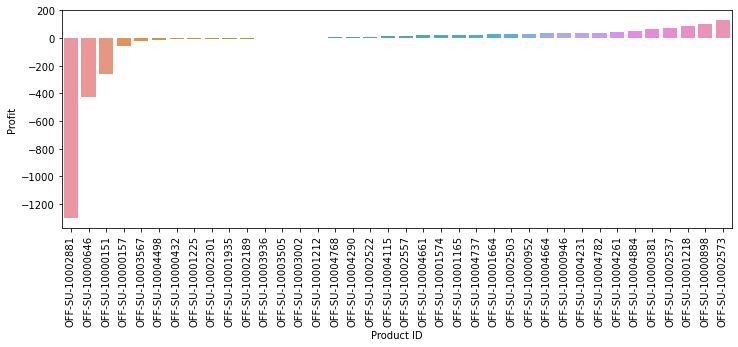

In [31]:
plt.figure(figsize=(12, 4))

sns.barplot(x=supplies_product_id.index, y=supplies_product_id.Profit)
plt.xticks(rotation=90)
plt.show()

### ANÁLISIS POR MODO DE ENVÍO

In [32]:
grouped_by_shipmode = data.groupby(['Ship Mode']).sum().drop('Postal Code', axis=1)
grouped_by_shipmode['percent_sales'] = round(grouped_by_shipmode.Sales / sum(grouped_by_shipmode.Sales) * 100, 2)
grouped_by_shipmode['percent_quantity'] = round(grouped_by_shipmode.Quantity / sum(grouped_by_shipmode.Quantity) * 100, 2)
grouped_by_shipmode['percent_discount'] = round(grouped_by_shipmode.Discount / sum(grouped_by_shipmode.Discount) * 100, 2)
grouped_by_shipmode['percent_profit'] = round(grouped_by_shipmode.Profit / sum(grouped_by_shipmode.Profit) * 100, 2)
grouped_by_shipmode = grouped_by_shipmode.sort_values(by='percent_quantity', ascending=False)
grouped_by_shipmode

,Sales,Quantity,Discount,Profit,percent_sales,percent_quantity,percent_discount,percent_profit
Ship Mode,,,,,,,,
Standard Class,1358215.74,22797,194860.08,164088.79,59.12,60.19,60.41,57.29
Second Class,459193.57,7423,55830.73,57446.64,19.99,19.60,17.31,20.06
First Class,351428.42,5693,51795.19,48969.84,15.30,15.03,16.06,17.10
Same Day,128363.12,1960,20096.12,15891.76,5.59,5.18,6.23,5.55


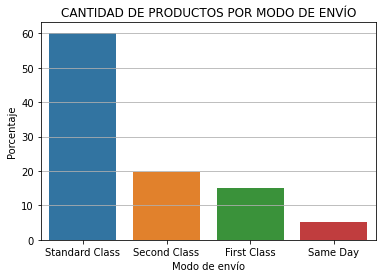

In [33]:
sns.barplot(x=grouped_by_shipmode.index, y=grouped_by_shipmode.percent_quantity)
plt.title('CANTIDAD DE PRODUCTOS POR MODO DE ENVÍO')
plt.xlabel('Modo de envío')
plt.ylabel('Porcentaje')
plt.grid(axis='y')
plt.show()

## ANÁLISIS TEMPORAL

In [34]:
# Lista de los meses
meses = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto',
         'Septiembre','Octubre','Noviembre','Diciembre']

# Serie temporal
data_date = data.set_index('Order Date').drop('Postal Code', axis=1)

In [35]:
# Datos agrupados por mes
data_by_month = data_date.groupby(data_date.index.month).sum()
data_by_month

,Sales,Quantity,Discount,Profit
Order Date,,,,
1,94924.84,1475,13047.60,9134.45
2,59751.25,1067,5740.24,10294.61
3,205005.49,2564,32876.57,28594.69
4,137762.13,2447,19323.57,11587.44
5,155028.81,2791,22125.60,22411.31
6,152718.68,2680,20677.39,21285.80
7,147238.10,2705,21910.24,13832.66
8,159044.06,2784,23358.07,21776.94
9,307649.95,5062,45513.03,36857.48


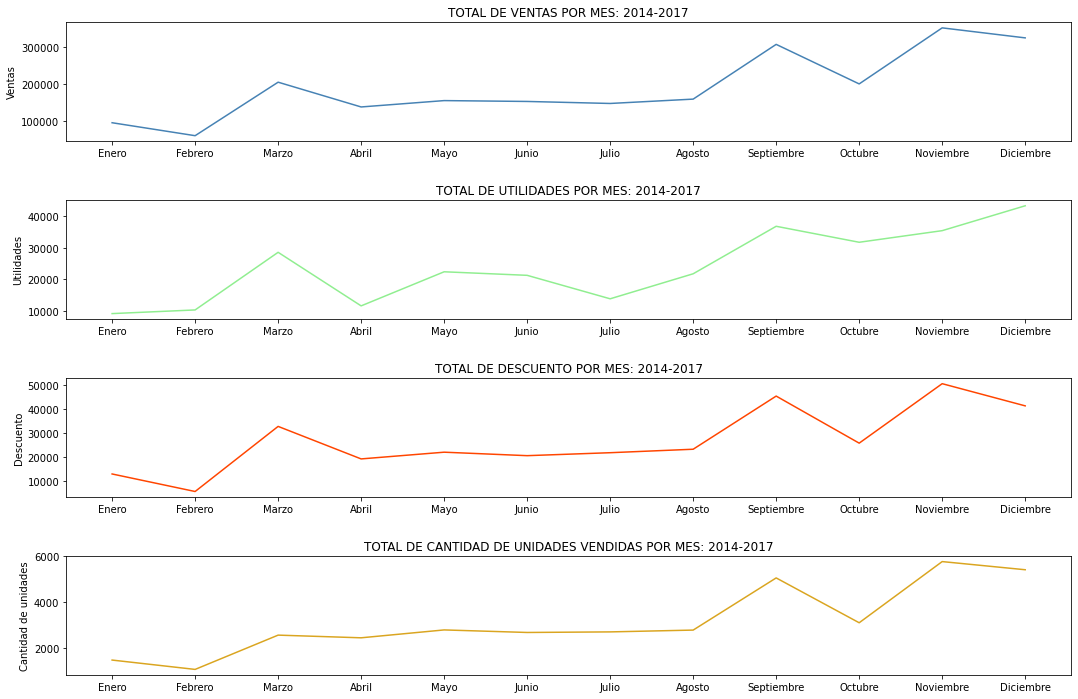

In [36]:
fig, ax = plt.subplots(4,1, figsize=(18,12))

# Ventas por mes
sns.lineplot(x=data_by_month.index, y=data_by_month.Sales, color='steelblue', ax=ax[0])
ax[0].set_title('TOTAL DE VENTAS POR MES: 2014-2017')
ax[0].set_xlabel(None)
ax[0].set_ylabel('Ventas')
ax[0].set_xticks(np.arange(1,13))
ax[0].set_xticklabels(meses)

# Utilidades por mes
sns.lineplot(x=data_by_month.index, y=data_by_month.Profit, color='lightgreen', ax=ax[1])
ax[1].set_title('TOTAL DE UTILIDADES POR MES: 2014-2017')
ax[1].set_xlabel(None)
ax[1].set_ylabel('Utilidades')
ax[1].set_xticks(np.arange(1,13))
ax[1].set_xticklabels(meses)

# Descuento por mes
sns.lineplot(x=data_by_month.index, y=data_by_month.Discount, color='orangered', ax=ax[2])
ax[2].set_title('TOTAL DE DESCUENTO POR MES: 2014-2017')
ax[2].set_xlabel(None)
ax[2].set_ylabel('Descuento')
ax[2].set_xticks(np.arange(1,13))
ax[2].set_xticklabels(meses)

# Descuento por mes
sns.lineplot(x=data_by_month.index, y=data_by_month.Quantity, color='goldenrod', ax=ax[3])
ax[3].set_title('TOTAL DE CANTIDAD DE UNIDADES VENDIDAS POR MES: 2014-2017')
ax[3].set_xlabel(None)
ax[3].set_ylabel('Cantidad de unidades')
ax[3].set_xticks(np.arange(1,13))
ax[3].set_xticklabels(meses)

plt.subplots_adjust(hspace=.5)
plt.show()

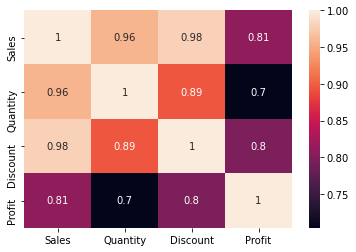

In [37]:
data_monthly_pct_changes = data_by_month.pct_change()
corr_matrix = data_monthly_pct_changes.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

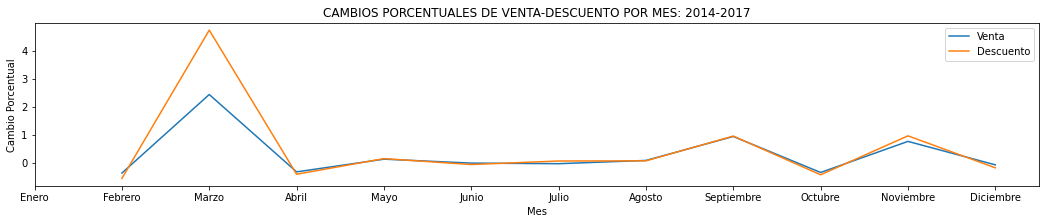

In [38]:
# Cambios porcentuales por mes-año
fig, ax = plt.subplots(figsize=(18,3))

sns.lineplot(x=data_monthly_pct_changes.index, y=data_monthly_pct_changes.Sales)
sns.lineplot(x=data_monthly_pct_changes.index, y=data_monthly_pct_changes.Discount)
plt.title('CAMBIOS PORCENTUALES DE VENTA-DESCUENTO POR MES: 2014-2017')
plt.xlabel('Mes')
plt.ylabel('Cambio Porcentual')
plt.xticks(np.arange(1, 13))
ax.set_xticklabels(meses)
plt.legend(['Venta','Descuento'])
plt.show()

### ANÁLISIS TEMPORAL POR REGIÓN

In [39]:
date_region = data_date.groupby([data_date.index.month, 'Region']).mean()
date_region

Sales  Quantity  Discount  Profit
Order Date Region                                    
1          Central 290.67      3.62     35.07   26.20
           East    170.56      3.41     39.89   -5.75
           South   301.12      4.39     37.39   30.12
           West    235.29      4.14     26.24   42.64
2          Central 117.30      3.30     24.75   -7.37
           East    180.26      3.59     20.59   35.82
           South   403.49      3.92     12.30   99.18
           West    164.35      3.52     17.50   28.29
3          Central 232.86      3.71     43.65    6.93
           East    191.68      3.62     27.68   22.62
           South   436.41      3.70    111.41   56.36
           West    357.34      3.72     29.64   78.46
4          Central 191.24      3.58     36.43    0.01
           East    193.56      3.54     20.98   27.92
           South   227.94      3.77     17.44   33.09
           West    214.93      3.78     39.58    7.98
5          Central 188.51      3.73     27.02   18.85
           East    212.94      3.57     40.69   33.16
           South   225.49      3.92     21.49   39.69
           West    220.18      4.00     28.15   32.60
6          Central 193.41      3.70     29.04   13.09
           East    214.77      3.76     27.83   34.81
           South   194.67      3.50     23.28   29.69
           West    239.01      3.90     33.23   38.16
7          Central 190.02      4.01     39.54  -11.34
           East    167.99      3.67     29.41   18.63
           South   137.53      3.74     10.54   25.52
           West    289.94      3.82     34.87   40.83
8          Central 171.54      3.90     28.20   16.02
           East    239.51      4.12     40.65   23.41
           South   228.62      4.12     32.63   33.81
           West    244.60      3.76     30.73   43.35
9          Central 264.03      3.90     52.90   12.21
           East    239.23      3.53     33.56   27.50
           South   213.25      3.75     27.31   31.04
           West    182.15      3.60     21.62   33.31
10         Central 286.81      3.77     28.01   67.81
           East    305.45      3.76     32.07   62.64
           South   187.61      3.64     39.89  -13.00
           West    200.61      3.89     29.99   26.50
11         Central 175.27      3.83     26.98    6.52
           East    317.80      4.01     41.15   41.67
           South   262.28      4.00     50.12    9.95
           West    205.45      3.89     26.11   29.00
12         Central 237.85      3.79     26.12   36.95
           East    252.22      3.81     32.35   35.31
           South   207.13      3.77     22.32   27.38
           West    220.48      3.94     31.79   25.27

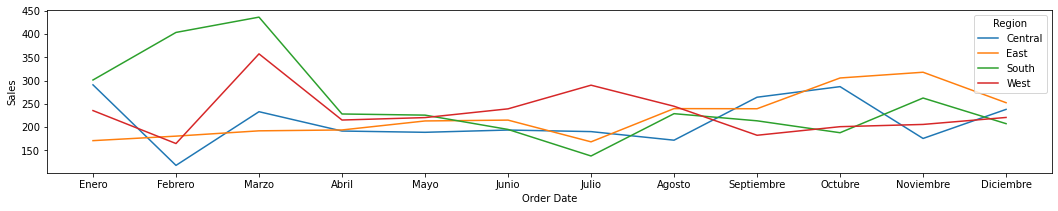

In [40]:
fig, ax = plt.subplots(figsize=(18,3))
sns.lineplot(x=date_region.index.get_level_values(0), y=date_region.Sales, 
             hue=date_region.index.get_level_values(1))
plt.xticks(np.arange(1, 13))
ax.set_xticklabels(meses)

plt.show()


### ANÁLISIS TEMPORAL POR CATEGORÍA

In [41]:
date_category = data_date.groupby([data_date.index.month, 'Category']).mean()
date_category

Sales  Quantity  Discount  Profit
Order Date Category                                          
1          Furniture       389.74      4.26     74.40  -24.00
           Office Supplies 146.40      3.78     12.22   27.51
           Technology      412.63      3.71     58.18   66.23
2          Furniture       250.25      3.30     40.71   11.01
           Office Supplies 116.62      3.72      7.82   24.15
           Technology      389.06      3.35     29.86   88.78
3          Furniture       362.63      3.76     65.14    5.51
           Office Supplies 136.20      3.69     10.38   25.26
           Technology      689.10      3.58    137.05  122.30
4          Furniture       294.92      3.69     49.86   10.58
           Office Supplies 117.98      3.63     12.90   11.33
           Technology      429.10      3.77     63.39   48.46
5          Furniture       322.43      3.92     44.78   15.35
           Office Supplies  95.39      3.79      8.09   20.02
           Technology      474.94      3.69     87.76   82.68
6          Furniture       365.51      3.71     63.09    6.78
           Office Supplies 116.06      3.78     12.04   25.00
           Technology      374.45      3.63     48.01   71.55
7          Furniture       301.08      3.77     51.47    8.61
           Office Supplies 104.13      3.77     13.52    5.62
           Technology      412.44      3.98     59.27   75.95
8          Furniture       361.97      3.72     68.97    0.03
           Office Supplies 137.77      4.00     16.74   28.10
           Technology      397.14      3.98     55.38   69.46
9          Furniture       377.24      3.54     59.59   19.36
           Office Supplies 117.79      3.69     13.78   20.00
           Technology      421.10      3.70     71.13   59.74
10         Furniture       310.63      3.79     60.49  -16.19
           Office Supplies 116.22      3.80     13.41   23.01
           Technology      554.34      3.76     52.31  152.12
11         Furniture       380.21      3.82     62.27   12.29
           Office Supplies 115.79      4.00     13.47   17.95
           Technology      455.33      3.83     66.58   55.70
12         Furniture       371.40      3.98     55.14   19.56
           Office Supplies 124.11      3.81     12.69   21.69
           Technology      398.55      3.79     50.82   75.16

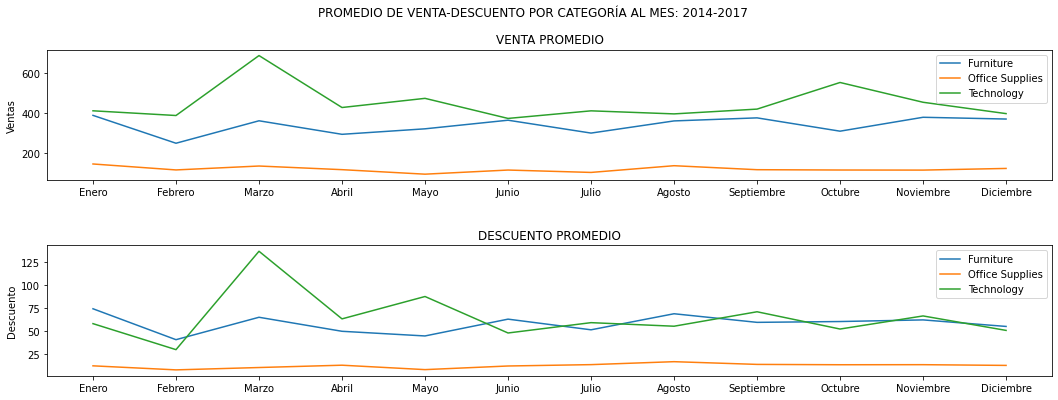

In [42]:
fig, ax = plt.subplots(2,1, figsize=(18,6))

sns.lineplot(x=date_category.index.get_level_values(0), y=date_category.Sales, 
             hue=date_category.index.get_level_values(1), ax=ax[0])
ax[0].set_title('VENTA PROMEDIO')
ax[0].set_xlabel(None)
ax[0].set_ylabel('Ventas')
ax[0].set_xticks(np.arange(1, 13))
ax[0].set_xticklabels(meses)
ax[0].legend(loc='upper right')

sns.lineplot(x=date_category.index.get_level_values(0), y=date_category.Discount, 
             hue=date_category.index.get_level_values(1), ax=ax[1])
ax[1].set_title('DESCUENTO PROMEDIO')
ax[1].set_xlabel(None)
ax[1].set_ylabel('Descuento')
ax[1].set_xticks(np.arange(1, 13))
ax[1].set_xticklabels(meses)
ax[1].legend(loc='upper right')

plt.suptitle('PROMEDIO DE VENTA-DESCUENTO POR CATEGORÍA AL MES: 2014-2017')
plt.subplots_adjust(hspace=.5)
plt.show()

### ANÁLISIS TEMPORAL POR SUB-CATEGORÍA

In [43]:
date_subcategory = data_date.groupby([data_date.index.month, 'Sub-Category']).mean()
date_subcategory

Sales  Quantity  Discount  Profit
Order Date Sub-Category                                   
1          Accessories  182.60      3.70      9.46   44.59
           Appliances   288.75      3.64     41.72   54.44
           Art           22.86      3.27      0.99    5.82
           Binders      200.23      4.00     27.92   46.75
           Bookcases    411.72      3.69     76.99  -42.40
...                        ...       ...       ...     ...
12         Paper         58.59      3.85      3.44   25.60
           Phones       343.51      3.63     51.40   47.30
           Storage      255.36      3.31      8.81   31.14
           Supplies     176.08      3.56      8.99   -0.60
           Tables       816.53      4.29    144.26  -18.44

[203 rows x 4 columns]

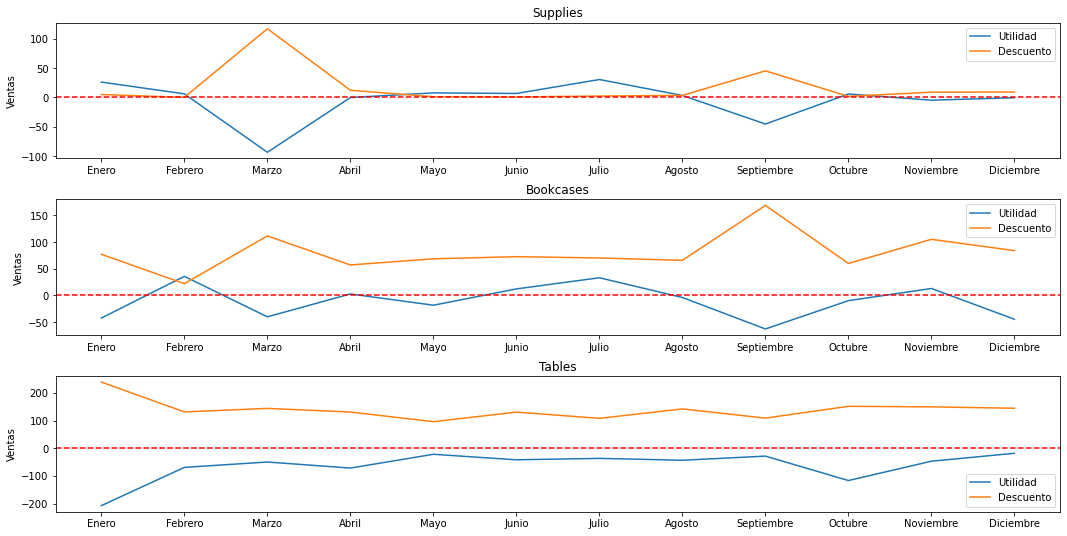

In [44]:
fig, ax = plt.subplots(3,1, figsize=(18, 9))
for i, sub in enumerate(['Supplies', 'Bookcases', 'Tables']):
    mask = date_subcategory[date_subcategory.index.get_level_values(1)== sub]
    sns.lineplot(x=mask.index.get_level_values(0), y=mask.Profit, ax=ax[i])
    sns.lineplot(x=mask.index.get_level_values(0), y=mask.Discount, ax=ax[i])
    ax[i].set_title(sub)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel('Ventas')
    ax[i].set_xticks(np.arange(1,13))
    ax[i].set_xticklabels(meses)
    ax[i].axhline(y=0, color='r', linestyle='--')
    ax[i].legend(['Utilidad','Descuento'])

plt.subplots_adjust(hspace=.3)